<a href="https://colab.research.google.com/github/disha2sinha/Reducing-Imbalanced-dataset-by-Under-sampling-approach-Consensus-Clustering/blob/main/Consensus_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
colon_majority = pd.read_csv("C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\colon_majority.csv")
colon_majority.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C1,C2,C3
0,1,1,1,0,152.0,16,2,2630.0,2,0,4,1,4
1,0,0,1,0,152.0,69,2,27645.0,0,0,0,4,3
2,1,1,1,0,152.0,211,2,29023.0,0,0,0,0,3
3,0,1,1,0,152.0,23,2,27954.0,2,0,0,4,3
4,1,0,0,1,26.0,209,0,2630.0,0,0,4,1,4


In [3]:
colon_majority=colon_majority.reset_index(drop=False)
colon_majority.head()

,index,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C1,C2,C3
0,0,1,1,1,0,152.0,16,2,2630.0,2,0,4,1,4
1,1,0,0,1,0,152.0,69,2,27645.0,0,0,0,4,3
2,2,1,1,1,0,152.0,211,2,29023.0,0,0,0,0,3
3,3,0,1,1,0,152.0,23,2,27954.0,2,0,0,4,3
4,4,1,0,0,1,26.0,209,0,2630.0,0,0,4,1,4


In [4]:
clustering_result=colon_majority[['index','C1','C2','C3']]
clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
clustering_result                       

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\3334172681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)


,Datapoint(x),C1,C2,C3
0,0,4,1,4
1,1,0,4,3
2,2,0,0,3
3,3,0,4,3
4,4,4,1,4
...,...,...,...,...
205896,205896,0,4,3
205897,205897,0,4,3
205898,205898,2,3,0
205899,205899,0,4,3


This code initializes dictionaries for storing data points categorized into clusters based on their labels (C1, C2, C3) and computes a contingency matrix to analyze the overlap between clusters from different categorizations (C3 and C1). Each cluster's data points are collected, and the matrix quantifies commonalities between cluster pairs, offering insights into how cluster memberships align or differ across two clustering approaches, with the results encapsulated in a pandas DataFrame for easy visualization and analysis.

In [5]:
num_of_clusters=5
C1_datapoints={}
C2_datapoints={}
C3_datapoints={}
def clusters(dictionary, clustername, num_clusters):
    # Initialize all cluster IDs as keys with empty lists
    for n in range(num_clusters):
        dictionary[n] = dictionary.get(n, [])
    for i in clustering_result.index:
        cluster_id = clustering_result.loc[i, clustername]
        dictionary[cluster_id].append(clustering_result.loc[i, 'Datapoint(x)'])
    return dictionary

# Assuming num_of_clusters is defined as 7
C1_datapoints = clusters(C1_datapoints, 'C1', num_of_clusters)
C2_datapoints = clusters(C2_datapoints, 'C2', num_of_clusters)
C3_datapoints = clusters(C3_datapoints, 'C3', num_of_clusters)

def common_member(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return len(set1.intersection(set2))

contingency_matrix1 = []
for i in range(num_of_clusters):
    common = []
    for j in range(num_of_clusters):
        common_element = common_member(C3_datapoints[i], C1_datapoints[j])
        common.append(common_element)
    contingency_matrix1.append(common)

contingency_df1 = pd.DataFrame(contingency_matrix1, index=['C30', 'C31', 'C32', 'C33', 'C34'], columns=['C10', 'C11', 'C12', 'C13', 'C14'])
print(contingency_df1)


       C10    C11    C12    C13    C14
C30      0      0  13958      0      0
C31      0  34661    623    949      0
C32    825      0      0  63004      0
C33  55497      0      0      0      0
C34      0      0      0      0  36384


In [6]:
print("C1 clusters :",C1_datapoints)
print("C2 clusters :",C2_datapoints)

contingency_matrix2=[]
for i in range(5):
  common=[]
  for j in range(5):
    common_element=common_member(C2_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix2.append(common)
contingency_df2=pd.DataFrame(contingency_matrix2,index=['C20','C21','C22','C23','C24'],columns=['C10','C11','C12','C13','C14'])
contingency_df2


C1 clusters : {0: [1, 2, 3, 10, 11, 13, 17, 18, 19, 25, 27, 31, 32, 34, 36, 38, 48, 51, 53, 57, 59, 60, 63, 70, 72, 74, 79, 80, 83, 84, 86, 88, 89, 94, 98, 99, 108, 111, 112, 115, 120, 122, 124, 126, 127, 132, 134, 136, 138, 142, 152, 171, 176, 179, 180, 182, 185, 192, 193, 196, 208, 210, 213, 214, 216, 217, 221, 222, 229, 230, 233, 234, 236, 238, 243, 247, 250, 251, 264, 265, 272, 273, 281, 282, 283, 284, 286, 288, 289, 294, 295, 301, 302, 305, 307, 308, 319, 320, 321, 325, 326, 327, 330, 335, 341, 346, 349, 352, 357, 367, 369, 370, 380, 382, 384, 385, 389, 394, 396, 397, 398, 399, 405, 408, 409, 411, 414, 417, 422, 429, 430, 431, 433, 435, 436, 439, 441, 444, 445, 448, 449, 450, 453, 454, 457, 464, 465, 466, 467, 469, 470, 471, 474, 475, 476, 483, 488, 496, 498, 505, 506, 507, 511, 512, 513, 519, 525, 527, 531, 533, 535, 536, 537, 538, 539, 544, 547, 551, 555, 556, 558, 565, 571, 573, 576, 579, 584, 586, 590, 591, 598, 599, 601, 602, 603, 608, 610, 613, 618, 622, 624, 630, 637, 643, 

,C10,C11,C12,C13,C14
C20,8077,0,0,57824,0
C21,0,0,0,0,36359
C22,0,33454,0,6129,0
C23,0,1207,14581,0,0
C24,48245,0,0,0,25


In [7]:
print('C1',len(C1_datapoints) ,'C2', len(C2_datapoints),'C3', len(C3_datapoints))

C1 5 C2 5 C3 5


In [8]:
contigency_mat=pd.concat([contingency_df2, contingency_df1])
print("-----------Contrigency matrix----------")
contigency_mat

-----------Contrigency matrix----------


,C10,C11,C12,C13,C14
C20,8077,0,0,57824,0
C21,0,0,0,0,36359
C22,0,33454,0,6129,0
C23,0,1207,14581,0,0
C24,48245,0,0,0,25
C30,0,0,13958,0,0
C31,0,34661,623,949,0
C32,825,0,0,63004,0
C33,55497,0,0,0,0
C34,0,0,0,0,36384


In [9]:
import pandas as pd
import numpy as np

# Assuming 'clustering_result' and 'num_of_clusters' are already defined
num_of_clusters = 5
C1_datapoints = {}
C2_datapoints = {}
C3_datapoints = {}

def clusters(dictionary, clustername, num_clusters=7):
    # Initialize all cluster IDs as keys with empty lists
    for n in range(num_clusters):
        dictionary[n] = dictionary.get(n, [])
    # Append data points to the appropriate cluster ID
    for i in clustering_result.index:
        cluster_id = clustering_result.loc[i, clustername]
        dictionary[cluster_id].append(clustering_result.loc[i, 'Datapoint(x)'])
    return dictionary

# Modified clusters function to include initialization of all clusters
C1_datapoints = clusters(C1_datapoints, 'C1', num_of_clusters)
C2_datapoints = clusters(C2_datapoints, 'C2', num_of_clusters)
C3_datapoints = clusters(C3_datapoints, 'C3', num_of_clusters)

def union(list1, list2):
    if not list1 and not list2:  # Check if both lists are empty
        return 0
    l = list1 + list2
    return len(set(l))

def common_member(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return len(set1.intersection(set2))

union_df1 = []
common_df1 = []

for i in range(num_of_clusters):
    uni = []
    common = []
    for j in range(num_of_clusters):
        union_element = union(C3_datapoints[i], C1_datapoints[j])
        common_element = common_member(C3_datapoints[i], C1_datapoints[j])
        uni.append(union_element)
        common.append(common_element)
    
    union_df1.append(uni)
    common_df1.append(common)

# Ensure division by zero is handled correctly
confusion_mat1 = np.divide(common_df1, union_df1, where=np.array(union_df1)!=0)

# Creating a DataFrame for better visualization
confusion_df1 = pd.DataFrame(confusion_mat1, index=['C30', 'C31', 'C32', 'C33', 'C34'], columns=['C10', 'C11', 'C12', 'C13', 'C14'])

print(confusion_df1)

          C10       C11       C12       C13  C14
C30  0.000000  0.000000  0.957273  0.000000  0.0
C31  0.000000  0.956614  0.012413  0.009563  0.0
C32  0.006914  0.000000  0.000000  0.972614  0.0
C33  0.985352  0.000000  0.000000  0.000000  0.0
C34  0.000000  0.000000  0.000000  0.000000  1.0


In [10]:

import numpy as np


C1_datapoints={}
C2_datapoints={}
C3_datapoints={}

def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')


union_df2 = []
common_df2 = []

for i in range(5):
  uni = []
  common = []
  for j in range(5):
    union_element = union(C2_datapoints[i],C1_datapoints[j])
    common_element = common_member(C2_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
   
  union_df2.append(uni)
  common_df2.append(common)

confusion_mat2 = np.divide(common_df2, union_df2)

confusion_mat2=pd.DataFrame(confusion_mat2,index=['C20','C21','C22','C23','C24'],columns=['C10','C11','C12','C13','C14'])
common_df2, union_df2
confusion_mat2

,C10,C11,C12,C13,C14
C20,0.070760,0.000000,0.00000,0.802777,0.000000
C21,0.000000,0.000000,0.00000,0.000000,0.999313
C22,0.000000,0.820152,0.00000,0.062922,0.000000
C23,0.000000,0.024512,0.92355,0.000000,0.000000
C24,0.856212,0.000000,0.00000,0.000000,0.000295


In [11]:
# Assuming confusion_mat2 and confusion_mat1 are numpy arrays
# Convert them to pandas DataFrame first
confusion_df1 = pd.DataFrame(confusion_mat1, index=['C30', 'C31', 'C32', 'C33', 'C34'], columns=['C10', 'C11', 'C12', 'C13', 'C14'])
confusion_df2 = pd.DataFrame(confusion_mat2, index=['C20', 'C21', 'C22', 'C23', 'C24'], columns=['C10', 'C11', 'C12', 'C13', 'C14'])

# Now you can concatenate them since both are DataFrames
confusion_mat = pd.concat([confusion_df2, confusion_df1])
print("-----------Confusion matrix----------")
print(confusion_mat)


-----------Confusion matrix----------
          C10       C11       C12       C13       C14
C20  0.070760  0.000000  0.000000  0.802777  0.000000
C21  0.000000  0.000000  0.000000  0.000000  0.999313
C22  0.000000  0.820152  0.000000  0.062922  0.000000
C23  0.000000  0.024512  0.923550  0.000000  0.000000
C24  0.856212  0.000000  0.000000  0.000000  0.000295
C30  0.000000  0.000000  0.957273  0.000000  0.000000
C31  0.000000  0.956614  0.012413  0.009563  0.000000
C32  0.006914  0.000000  0.000000  0.972614  0.000000
C33  0.985352  0.000000  0.000000  0.000000  0.000000
C34  0.000000  0.000000  0.000000  0.000000  1.000000


In [12]:
CCluster = []
CLabel = ['C10', 'C11',	'C12', 'C13',	'C14']

for i in range(len(confusion_mat)):
  l =confusion_mat.iloc[i]
  l = list(l)
  ind = l.index(max(l))
  CCluster.append(CLabel[ind])
CCluster

['C13', 'C14', 'C11', 'C12', 'C10', 'C12', 'C11', 'C13', 'C10', 'C14']

In [13]:
confusion_matrix = confusion_mat
confusion_matrix['CCluster'] = CCluster
confusion_matrix.tail(8)

,C10,C11,C12,C13,C14,CCluster
C22,0.000000,0.820152,0.000000,0.062922,0.000000,C11
C23,0.000000,0.024512,0.923550,0.000000,0.000000,C12
C24,0.856212,0.000000,0.000000,0.000000,0.000295,C10
C30,0.000000,0.000000,0.957273,0.000000,0.000000,C12
C31,0.000000,0.956614,0.012413,0.009563,0.000000,C11
C32,0.006914,0.000000,0.000000,0.972614,0.000000,C13
C33,0.985352,0.000000,0.000000,0.000000,0.000000,C10
C34,0.000000,0.000000,0.000000,0.000000,1.000000,C14


In [14]:
clustering_result['C3'].values

array([4, 3, 3, ..., 0, 3, 2], dtype=int64)

In [15]:
print(clustering_result.shape)

(205901, 4)


In [16]:
from sklearn.cluster import KMeans

# Assuming you've preprocessed clustering_result as needed
kmeans_C2 = KMeans(n_clusters=num_of_clusters, random_state=42).fit(clustering_result)
C2 = kmeans_C2.labels_

kmeans_C3 = KMeans(n_clusters=num_of_clusters, random_state=42).fit(clustering_result)
C3 = kmeans_C3.labels_

# Verify the length of C2 and C3
print(len(C2), len(C3))


205901 205901


In [17]:
#Relabeling
new_clustering_result = clustering_result
new_clustering_result['C2'] = C2
new_clustering_result['C3'] = C3
new_clustering_result

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\2682590482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_clustering_result['C2'] = C2
C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\2682590482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_clustering_result['C3'] = C3


,Datapoint(x),C1,C2,C3
0,0,4,2,2
1,1,0,2,2
2,2,0,2,2
3,3,0,2,2
4,4,4,2,2
...,...,...,...,...
205896,205896,0,1,1
205897,205897,0,1,1
205898,205898,2,1,1
205899,205899,0,1,1


In [18]:
#Majority Voting

C = []
for i in range(len(new_clustering_result)):
  l = new_clustering_result.iloc[i]
  l = list(l[1:])
  majority_label = max(set(l), key = l.count)
  C.append(majority_label)

new_clustering_result['C'] = C
new_clustering_result

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\3352326112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_clustering_result['C'] = C


,Datapoint(x),C1,C2,C3,C
0,0,4,2,2,2
1,1,0,2,2,2
2,2,0,2,2,2
3,3,0,2,2,2
4,4,4,2,2,2
...,...,...,...,...,...
205896,205896,0,1,1,1
205897,205897,0,1,1,1
205898,205898,2,1,1,1
205899,205899,0,1,1,1


In [19]:
consensus_clustering_result=new_clustering_result.drop(['C1', 'C2', 'C3'], axis = 1)
consensus_clustering_result

,Datapoint(x),C
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
205896,205896,1
205897,205897,1
205898,205898,1
205899,205899,1


In [20]:
colon_majority.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
colon_majority=colon_majority.merge(consensus_clustering_result,on='Datapoint(x)')
colon_majority=colon_majority.drop(columns=['C1','C2','C3'])
colon_majority

,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C
0,0,1,1,1,0,152.0,16,2,2630.000,2,0,2
1,1,0,0,1,0,152.0,69,2,27645.000,0,0,2
2,2,1,1,1,0,152.0,211,2,29023.000,0,0,2
3,3,0,1,1,0,152.0,23,2,27954.000,2,0,2
4,4,1,0,0,1,26.0,209,0,2630.000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
205896,205896,0,1,1,0,152.0,131,2,22911.000,2,0,1
205897,205897,1,0,1,1,152.0,105,2,23938.000,0,0,1
205898,205898,1,1,1,0,152.0,144,2,61800.375,0,0,1
205899,205899,0,1,1,0,152.0,208,2,25380.000,0,0,1


# Cluster: 0

In [21]:
cluster_0 = colon_majority[colon_majority['C']==0]
cluster_0

,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C
80863,80863,1,0,0,1,120.0,90,1,52734.000,2,0,0
80864,80864,0,1,1,0,160.0,276,2,61800.375,0,0,0
80865,80865,1,1,0,0,26.0,184,0,61800.375,0,0,0
80866,80866,1,1,0,0,26.0,245,1,2630.000,2,0,0
80867,80867,1,1,1,0,151.0,50,2,28481.000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122038,122038,0,1,1,0,152.0,85,2,20645.000,0,0,0
122039,122039,0,0,0,1,139.0,195,0,38485.000,0,0,0
122040,122040,1,0,1,1,152.0,236,2,42182.000,0,0,0
122041,122041,1,0,1,1,124.0,252,2,50827.000,2,0,0


# Cluster: 1

In [22]:
cluster_1 = colon_majority[colon_majority['C']==1]
cluster_1

,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C
163796,163796,1,1,1,0,160.0,27,2,27083.000,0,0,1
163797,163797,1,0,1,1,160.0,68,2,2630.000,0,0,1
163798,163798,0,0,0,1,122.0,75,0,46349.000,0,0,1
163799,163799,1,1,0,1,124.0,295,1,61800.375,0,0,1
163800,163800,0,0,1,1,160.0,189,2,25591.000,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
205896,205896,0,1,1,0,152.0,131,2,22911.000,2,0,1
205897,205897,1,0,1,1,152.0,105,2,23938.000,0,0,1
205898,205898,1,1,1,0,152.0,144,2,61800.375,0,0,1
205899,205899,0,1,1,0,152.0,208,2,25380.000,0,0,1


# Cluster: 2

In [23]:
cluster_2 = colon_majority[colon_majority['C']==2]
cluster_2

,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C
0,0,1,1,1,0,152.0,16,2,2630.0,2,0,2
1,1,0,0,1,0,152.0,69,2,27645.0,0,0,2
2,2,1,1,1,0,152.0,211,2,29023.0,0,0,2
3,3,0,1,1,0,152.0,23,2,27954.0,2,0,2
4,4,1,0,0,1,26.0,209,0,2630.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
40250,40250,0,1,1,0,152.0,267,2,34547.0,2,0,2
40251,40251,1,1,1,0,26.0,225,2,32014.0,0,0,2
40252,40252,0,1,1,0,152.0,72,2,17300.0,2,0,2
40253,40253,1,1,0,0,124.0,52,0,2630.0,2,0,2


# Cluster: 3

In [24]:
cluster_3 = colon_majority[colon_majority['C']==3]
cluster_3

,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C
122043,122043,0,0,0,1,154.0,180,0,2630.0,2,0,3
122044,122044,0,0,1,1,152.0,202,2,27115.0,1,0,3
122045,122045,0,1,1,0,152.0,134,2,35493.0,2,0,3
122046,122046,0,0,0,1,122.0,250,1,46721.0,0,0,3
122047,122047,0,1,1,0,152.0,141,2,43360.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
163791,163791,0,1,1,0,152.0,134,2,26794.0,0,0,3
163792,163792,1,1,0,0,124.0,79,0,2630.0,0,0,3
163793,163793,0,1,1,0,152.0,228,2,29731.0,0,0,3
163794,163794,0,1,1,0,26.0,31,0,2630.0,2,0,3


# Cluster: 4

In [25]:
cluster_4 = colon_majority[colon_majority['C']==4]
cluster_4

,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C
40255,40255,0,1,1,0,152.0,115,2,34259.0,0,0,4
40256,40256,1,1,1,0,152.0,36,2,2630.0,0,0,4
40257,40257,0,0,1,1,152.0,137,2,2630.0,1,0,4
40258,40258,1,1,1,0,152.0,201,2,33763.0,0,0,4
40259,40259,1,1,1,0,152.0,108,2,49573.0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
80858,80858,1,1,1,0,152.0,168,2,2630.0,0,0,4
80859,80859,0,1,1,0,160.0,144,2,2630.0,2,0,4
80860,80860,0,0,1,1,160.0,261,2,38781.0,0,0,4
80861,80861,0,1,1,0,152.0,101,2,39574.0,0,0,4


### Centroid of different clusters:

In [26]:
from sklearn.neighbors import NearestCentroid
colon_majority
X=colon_majority.drop(columns=['Datapoint(x)','Response','C'])
y=colon_majority.C
clf=NearestCentroid()
clf.fit(X,y)
data_centroids=clf.centroids_
pd.DataFrame(data_centroids)


,0,1,2,3,4,5,6,7,8
0,0.490578,0.668188,0.680816,0.296163,129.659228,154.576372,1.330015,29022.708994,0.641646
1,0.486332,0.669422,0.682983,0.293979,129.834770,154.200048,1.331077,28863.668297,0.633820
2,0.493255,0.673581,0.681158,0.290076,129.669184,154.615948,1.329748,28958.855499,0.637585
3,0.488827,0.669772,0.680861,0.295117,129.289656,154.263119,1.324073,28939.146259,0.639188
4,0.495075,0.673094,0.686638,0.290903,130.516524,154.242538,1.333604,28995.679875,0.634284


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math

# Assuming 'cluster_0' is a DataFrame containing the data points of cluster 0
# and 'data_centroids' is a list of centroids where data_centroids[0] is the centroid of cluster 0

# Calculate distances from each point in cluster_0 to its centroid
distances = []
centroid_0 = list(data_centroids[0])  # Using the centroid for cluster 0

for index, row in cluster_0.iterrows():
    # Extract features, assuming non-feature columns are not at the ends of the dataframe
    point = list(row[1:-2])
    # Calculate Euclidean distance from the centroid
    dist = math.sqrt(sum((p - c) ** 2 for p, c in zip(point, centroid_0)))
    distances.append(dist)

# Add distances to the DataFrame
cluster_0['Distance from centroid'] = distances

# Sort DataFrame by distances
cluster_0_sorted = cluster_0.sort_values('Distance from centroid')

# Select a subset of points, for example, the closest 12,500 points (or adjust as needed)
reduced_cluster_0 = cluster_0_sorted.head(12532)

datapoints0=reduced_cluster_0


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\3898684794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['Distance from centroid'] = distances


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math

# Assuming 'cluster_1' is a DataFrame containing the data points of cluster 1
# and 'data_centroids' is a list of centroids where data_centroids[1] is the centroid of cluster 1

# Calculate distances from each point in cluster_1 to its centroid
distances = []
centroid_1 = list(data_centroids[1])  # Using the centroid for cluster 1

for index, row in cluster_1.iterrows():
    # Extract features, assuming non-feature columns are not at the ends of the dataframe
    point = list(row[1:-2])
    # Calculate Euclidean distance from the centroid
    dist = math.sqrt(sum((p - c) ** 2 for p, c in zip(point, centroid_1)))
    distances.append(dist)

# Add distances to the DataFrame
cluster_1['Distance from centroid'] = distances

# Sort DataFrame by distances
cluster_1_sorted = cluster_1.sort_values('Distance from centroid')

# Select a subset of points, for example, the closest 12,500 points
reduced_cluster_1 = cluster_1_sorted.head(12532)

# Optional: Save the reduced dataset to a new CSV file
datapoints1=reduced_cluster_1
datapoints1

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\1604844813.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['Distance from centroid'] = distances


,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C,Distance from centroid
170183,170183,0,1,1,0,151.0,145,2,28860.0,0,0,1,23.397567
204527,204527,1,1,1,0,152.0,143,2,28865.0,2,0,1,24.927613
199539,199539,1,1,1,0,152.0,157,2,28879.0,2,0,1,27.149074
166668,166668,1,0,1,0,151.0,173,2,28869.0,0,0,1,28.837134
181048,181048,1,1,1,0,152.0,175,2,28860.0,0,0,1,30.639861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178187,178187,0,1,1,0,152.0,230,2,32645.0,2,0,1,3782.156690
170520,170520,1,1,0,1,124.0,240,0,32645.0,2,0,1,3782.310154
202004,202004,0,1,1,0,152.0,181,2,25081.0,2,0,1,3782.828548
174363,174363,0,0,1,1,160.0,57,2,25082.0,2,0,1,3783.037998


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math

# Assuming 'cluster_2' is a DataFrame containing the data points of cluster 2
# and 'data_centroids' is a list of centroids where data_centroids[2] is the centroid of cluster 2

# Calculate distances from each point in cluster_2 to its centroid
distances = []
centroid_2 = list(data_centroids[2])  # Using the centroid for cluster 2

for index, row in cluster_2.iterrows():
    # Extract features, assuming non-feature columns are not at the ends of the dataframe
    point = list(row[1:-2])
    # Calculate Euclidean distance from the centroid
    dist = math.sqrt(sum((p - c) ** 2 for p, c in zip(point, centroid_2)))
    distances.append(dist)

# Add distances to the DataFrame
cluster_2['Distance from centroid'] = distances

# Sort DataFrame by distances
cluster_2_sorted = cluster_2.sort_values('Distance from centroid')

# Select a subset of points, for example, the closest 12,500 points
reduced_cluster_2 = cluster_2_sorted.head(12500)

datapoints2=reduced_cluster_2


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\4229901040.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2['Distance from centroid'] = distances


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math

# Assuming 'cluster_3' is a DataFrame containing the data points of cluster 3
# and 'data_centroids' is a list of centroids where data_centroids[3] is the centroid of cluster 3

# Calculate distances from each point in cluster_3 to its centroid
distances = []
centroid_3 = list(data_centroids[3])  # Using the centroid for cluster 3

for index, row in cluster_3.iterrows():
    point = list(row[1:-2])  # assuming the first and last two columns are not features
    dist = math.sqrt(sum((p - c)**2 for p, c in zip(point, centroid_3)))
    distances.append(dist)

# Add distances to the DataFrame
cluster_3['Distance from centroid'] = distances

# Sort DataFrame by distances
cluster_3_sorted = cluster_3.sort_values('Distance from centroid')

# Select the number of points you want to keep, for example, the closest 12,500 points
reduced_cluster_3 = cluster_3_sorted.head(12500)

# Optional: Save the reduced dataset to a new CSV file
datapoints3=reduced_cluster_3
datapoints3


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\2045109974.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3['Distance from centroid'] = distances


,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C,Distance from centroid
162387,162387,0,1,0,0,124.0,162,0,28945.0,0,0,3,11.187782
140889,140889,0,1,1,0,152.0,159,2,28944.0,2,0,3,23.761360
146958,146958,0,1,1,0,152.0,163,2,28945.0,0,0,3,25.055169
158814,158814,0,1,1,0,152.0,159,2,28929.0,0,0,3,25.348505
140214,140214,0,1,0,0,124.0,169,1,28962.0,0,0,3,27.728358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123738,123738,0,1,1,0,151.0,254,2,25033.0,0,0,3,3907.479851
163758,163758,0,1,0,0,152.0,264,0,25033.0,0,0,3,3907.753779
163313,163313,0,1,1,0,152.0,180,2,25031.0,0,0,3,3908.297165
157433,157433,1,1,1,0,152.0,128,2,25031.0,2,0,3,3908.300853


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math

# Assuming 'cluster_4' is a DataFrame containing the data points of cluster 4
# and 'data_centroids' is a list of centroids where data_centroids[4] is the centroid of cluster 4

# Calculate distances from each point in cluster_4 to its centroid
distances = []
centroid_4 = list(data_centroids[4])

for index, row in cluster_4.iterrows():
    point = list(row[1:-2])  # assuming the first and last two columns are not features
    dist = math.sqrt(sum((p - c)**2 for p, c in zip(point, centroid_4)))
    distances.append(dist)

# Add distances to the DataFrame
cluster_4['Distance from centroid'] = distances

# Sort DataFrame by distances
cluster_4_sorted = cluster_4.sort_values('Distance from centroid')

# Select the number of points you want to keep, for example, the closest 100 points
reduced_cluster_4 = cluster_4_sorted.head(12500)

# Optional: Save the reduced dataset to a new CSV file
datapoints4 = reduced_cluster_4
datapoints4

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\2842977233.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['Distance from centroid'] = distances


,Datapoint(x),Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response,C,Distance from centroid
57921,57921,1,0,1,1,124.0,145,0,29008.0,0,0,4,16.827504
52535,52535,0,1,0,0,129.0,139,1,28986.0,0,0,4,18.159198
80536,80536,1,1,1,0,152.0,160,2,28999.0,0,0,4,22.518934
60493,60493,1,0,0,1,124.0,142,0,29017.0,0,0,4,25.509913
77757,77757,0,1,1,0,152.0,144,2,28982.0,0,0,4,27.476709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72087,72087,1,0,1,1,151.0,269,2,32952.0,2,0,4,3958.037569
56365,56365,0,1,1,0,152.0,102,2,25038.0,2,0,4,3958.083332
55999,55999,0,0,0,0,157.0,282,0,32952.0,0,0,4,3958.471385
50026,50026,0,0,0,1,122.0,165,0,25037.0,0,0,4,3958.704139


### Final Reduced Dataset:

In [32]:
balanced_dataset_with_class0=pd.concat([datapoints0, datapoints1, datapoints2, datapoints3, datapoints4])
balanced_dataset_with_class0 = balanced_dataset_with_class0.drop(['C','Distance from centroid', 'Datapoint(x)'], axis=1)
balanced_dataset_with_class0

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response
86082,0,1,1,0,152.0,162,2,29022.0,2,0
81702,0,1,1,0,152.0,167,2,29013.0,0,0
103560,1,1,1,0,152.0,137,2,29012.0,0,0
110130,0,1,1,0,160.0,156,2,29024.0,0,0
97125,0,1,0,0,152.0,137,0,29011.0,0,0
...,...,...,...,...,...,...,...,...,...,...
72087,1,0,1,1,151.0,269,2,32952.0,2,0
56365,0,1,1,0,152.0,102,2,25038.0,2,0
55999,0,0,0,0,157.0,282,0,32952.0,0,0
50026,0,0,0,1,122.0,165,0,25037.0,0,0


In [33]:
og_dataset = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\aug_train_processed.csv')
minority_dataset = og_dataset[og_dataset['Response']==1]
minority_dataset = minority_dataset.drop(['id'], axis=1)


minority_dataset

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated,Region_Category
9,1,0,0,1,122.0,217,1,0,27801.000,0
12,1,0,1,1,122.0,165,1,0,25434.000,0
14,1,0,0,1,124.0,263,1,0,38347.000,0
15,1,0,0,1,26.0,155,1,0,33303.000,0
21,1,0,0,1,157.0,256,1,0,2630.000,0
...,...,...,...,...,...,...,...,...,...,...
381383,0,0,0,1,26.0,100,1,0,61800.375,0
381393,0,0,0,1,35.0,142,1,0,27348.000,0
381414,1,0,0,1,124.0,97,1,0,23926.000,0
381420,1,0,0,1,26.0,276,1,0,37138.000,0


In [34]:
balanced_dataset = pd.concat([balanced_dataset_with_class0, minority_dataset])
balanced_dataset

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response
86082,0,1,1,0,152.0,162,2,29022.000,2,0
81702,0,1,1,0,152.0,167,2,29013.000,0,0
103560,1,1,1,0,152.0,137,2,29012.000,0,0
110130,0,1,1,0,160.0,156,2,29024.000,0,0
97125,0,1,0,0,152.0,137,0,29011.000,0,0
...,...,...,...,...,...,...,...,...,...,...
381383,0,0,0,1,26.0,100,0,61800.375,0,1
381393,0,0,0,1,35.0,142,0,27348.000,0,1
381414,1,0,0,1,124.0,97,0,23926.000,0,1
381420,1,0,0,1,26.0,276,0,37138.000,0,1


In [35]:
balanced_dataset = balanced_dataset.sample(frac=1)
balanced_dataset

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response
78310,0,1,1,0,152.0,203,2,29548.0,2,0
26445,1,0,0,1,157.0,238,0,2630.0,2,1
319145,0,0,0,1,26.0,22,0,38397.0,0,1
159108,0,0,1,1,152.0,214,2,25086.0,2,0
173144,0,0,1,1,152.0,57,2,34887.0,0,1
...,...,...,...,...,...,...,...,...,...,...
335845,1,0,1,1,124.0,137,0,35943.0,2,1
833,0,0,1,1,152.0,33,2,30250.0,2,0
247651,1,0,0,1,124.0,195,0,34578.0,0,1
35543,0,0,0,1,26.0,221,0,33236.0,2,1


In [36]:
balanced_dataset.to_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Raw\\balanced_dataset_colon.csv', index = False)

In [37]:
df_1 = pd.read_csv("C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Raw\\balanced_dataset_colon.csv")
df_1.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Age_Group,Annual_Premium_Treated,Region_Category,Response
0,0,1,1,0,152.0,203,2,29548.0,2,0
1,1,0,0,1,157.0,238,0,2630.0,2,1
2,0,0,0,1,26.0,22,0,38397.0,0,1
3,0,0,1,1,152.0,214,2,25086.0,2,0
4,0,0,1,1,152.0,57,2,34887.0,0,1


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16000\682512355.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df_1['Response'], sort = True)


Text(0, 0.5, 'Frequency')

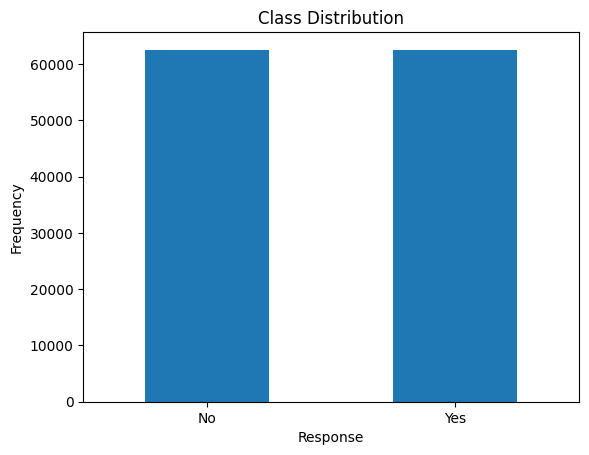

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(df_1['Response'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")
LABELS = ["No", "Yes"]
plt.xticks(range(2), LABELS)

plt.xlabel("Response")

plt.ylabel("Frequency")